In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv('scaled_X_features.csv')

# Separate the features (X) and target variable (y)
X = df.drop('learning_style', axis=1)
y = df['learning_style']


# Create an instance of the SMOTE class
smote = SMOTE()

# Apply SMOTE on the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Print the balanced class distribution
print('Original class distribution:', y.value_counts())
print('Resampled class distribution:', y_resampled.value_counts())


Original class distribution: 0    523
3    427
2     43
1      7
Name: learning_style, dtype: int64
Resampled class distribution: 0    523
3    523
2    523
1    523
Name: learning_style, dtype: int64


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0]
}

# Create an SVM classifier
svm_clf = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train an SVM classifier with the best parameters on the full training set
best_svm_clf = SVC(**best_params)
best_svm_clf.fit(X_train, y_train)

# Evaluate the best SVM classifier on the test set
accuracy = best_svm_clf.score(X_test, y_test)

# Print the results
print("Best Parameters:", best_params)
print("Best Score (CV Accuracy):", best_score)
print("Test Accuracy:", accuracy)


Best Parameters: {'C': 100, 'coef0': 1.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best Score (CV Accuracy): 0.9629475377603003
Test Accuracy: 0.964200477326969


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
tun=SVC(C= 100, gamma= 'auto', kernel= 'poly',degree=2,coef0=1.0)
# Train the classifier
tun.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tun.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Confusion Matrix:
[[ 98   0   3   6]
 [  0  95   0   0]
 [  0   0 112   0]
 [  3   0   3  99]]
Accuracy: 0.964200477326969


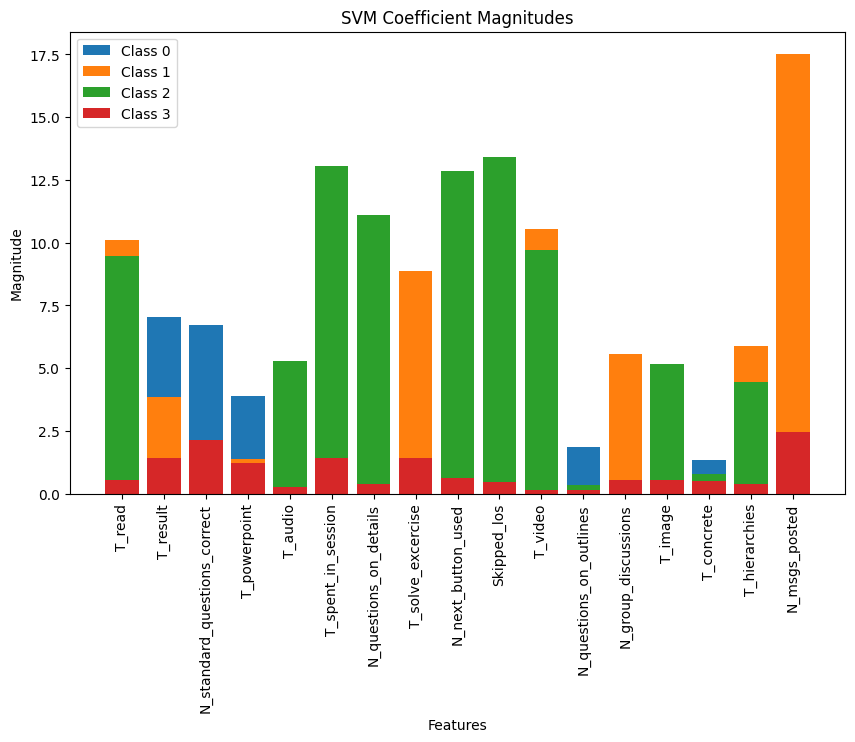

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Train the SVM classifier
model = SVC(C= 100, gamma= 'auto', kernel= 'linear',degree=2,coef0=1.0)
model.fit(X_train, y_train)

# Get the absolute magnitudes of the coefficients for each class
coefficients = np.abs(model.coef_)
class_names = model.classes_

# Plot the coefficients for each class
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(class_names):
    sorted_indices = coefficients[i].argsort()[::-1]
    sorted_coefficients = coefficients[i][sorted_indices]
    feature_names = X.columns[sorted_indices]
    plt.bar(feature_names, sorted_coefficients, label=f"Class {class_name}")

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Magnitude')
plt.title('SVM Coefficient Magnitudes')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

Accuracy of svm 0.964200477326969
F1 score of svm 0.9644267686241329




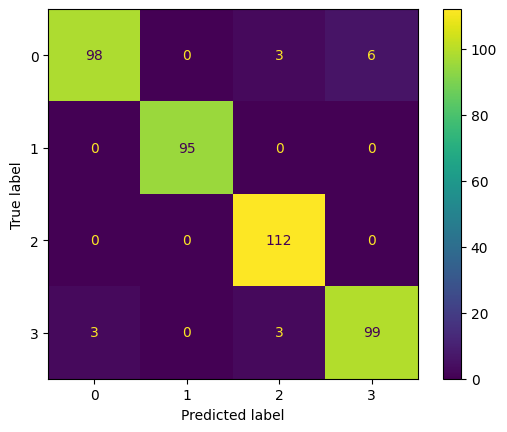

In [ ]:

model = SVC(C= 100, gamma= 'auto', kernel= 'poly',degree=2,coef0=1.0)
model.fit(X_train, y_train)
pred_svm=model.predict(X_test)
score_svm=accuracy_score(y_test,pred_svm)
f1_svm = f1_score(pred_svm, y_test, average="weighted")

print('Accuracy of svm',score_svm)
print('F1 score of svm',f1_svm)
print("\n")

cm = confusion_matrix(y_test, pred_svm, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have predicted labels stored in `y_pred` and true labels stored in `y_true`
print(classification_report(y_test, y_pred,zero_division=0))


              precision    recall  f1-score   support

           0       0.97      0.92      0.94       107
           1       1.00      1.00      1.00        95
           2       0.95      1.00      0.97       112
           3       0.94      0.94      0.94       105

    accuracy                           0.96       419
   macro avg       0.97      0.96      0.96       419
weighted avg       0.96      0.96      0.96       419



In [ ]:
from sklearn.model_selection import cross_val_score


tun=SVC(C= 100, gamma= 'auto', kernel= 'poly',degree=2,coef0=1.0)

# Perform cross-validation using SMOTE-applied samples
scores = cross_val_score(tun, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation scores:", scores)

# Compute the mean accuracy across all folds
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

print("Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))


Cross-validation scores: [0.95820896 0.95223881 0.96716418 0.96706587 0.97005988]
Mean accuracy: 0.9629475377603003
Accuracy: 96.29 %
Standard Deviation: 0.67 %
